In [7]:
#Handling the missing values
import pandas as pd
import numpy as np
nfl_data=pd.read_csv("/Users/murarimirthipati/Downloads/NFL Play by Play 2009-2016 (v3).csv")

/var/folders/sd/_1d9tncx5yx_t6s9w0bfr_8w0000gn/T/ipykernel_8913/1415654692.py:4: DtypeWarning: Columns (25,51) have mixed types. Specify dtype option on import or set low_memory=False.
  nfl_data=pd.read_csv("/Users/murarimirthipati/Downloads/NFL Play by Play 2009-2016 (v3).csv")


In [9]:
nfl_data.head()

,Date,GameID,Drive,qtr,down,time,TimeUnder,TimeSecs,PlayTimeDiff,SideofField,...,yacEPA,Home_WP_pre,Away_WP_pre,Home_WP_post,Away_WP_post,Win_Prob,WPA,airWPA,yacWPA,Season
0,2009-09-10,2009091000,1,1,NaN,15:00,15,3600.0,0.0,TEN,...,NaN,0.485675,0.514325,0.546433,0.453567,0.485675,0.060758,NaN,NaN,2009
1,2009-09-10,2009091000,1,1,1.0,14:53,15,3593.0,7.0,PIT,...,1.146076,0.546433,0.453567,0.551088,0.448912,0.546433,0.004655,-0.032244,0.036899,2009
2,2009-09-10,2009091000,1,1,2.0,14:16,15,3556.0,37.0,PIT,...,NaN,0.551088,0.448912,0.510793,0.489207,0.551088,-0.040295,NaN,NaN,2009
3,2009-09-10,2009091000,1,1,3.0,13:35,14,3515.0,41.0,PIT,...,-5.031425,0.510793,0.489207,0.461217,0.538783,0.510793,-0.049576,0.106663,-0.156239,2009
4,2009-09-10,2009091000,1,1,4.0,13:27,14,3507.0,8.0,PIT,...,NaN,0.461217,0.538783,0.558929,0.441071,0.461217,0.097712,NaN,NaN,2009


In [8]:
missing_values_count=nfl_data.isnull().sum()
missing_values_count[0:10]

Date                0
GameID              0
Drive               0
qtr                 0
down            54218
time              188
TimeUnder           0
TimeSecs          188
PlayTimeDiff      374
SideofField       450
dtype: int64

In [11]:
#Knowing the percentage of the null values so that we can eliminate the data based on the percentage
total_cells=np.product(nfl_data.shape)
total_missing=missing_values_count.sum()

percent_missing=(total_missing/total_cells)*100
print(percent_missing)

27.652267428200588


In [21]:
#here by using data intution we would just try to figure out whether the data is missing beacause it wasnt recorded or because it doesnt exist


Date                0
GameID              0
Drive               0
qtr                 0
down            54218
time              188
TimeUnder           0
TimeSecs          188
PlayTimeDiff      374
SideofField       450
dtype: int64

In [13]:
columns_with_na_dropped = nfl_data.dropna(axis=1)
print(columns_with_na_dropped.isnull().sum())

columns_with_na_dropped.head()


Date                           0
GameID                         0
Drive                          0
qtr                            0
TimeUnder                      0
ydstogo                        0
ydsnet                         0
PlayAttempted                  0
Yards.Gained                   0
sp                             0
Touchdown                      0
Safety                         0
Onsidekick                     0
PlayType                       0
PassAttempt                    0
AirYards                       0
YardsAfterCatch                0
QBHit                          0
InterceptionThrown             0
RushAttempt                    0
Reception                      0
Fumble                         0
Sack                           0
Challenge.Replay               0
Accepted.Penalty               0
Penalty.Yards                  0
HomeTeam                       0
AwayTeam                       0
Timeout_Indicator              0
posteam_timeouts_pre           0
HomeTimeou

,Date,GameID,Drive,qtr,TimeUnder,ydstogo,ydsnet,PlayAttempted,Yards.Gained,sp,...,AwayTeam,Timeout_Indicator,posteam_timeouts_pre,HomeTimeouts_Remaining_Pre,AwayTimeouts_Remaining_Pre,HomeTimeouts_Remaining_Post,AwayTimeouts_Remaining_Post,ExPoint_Prob,TwoPoint_Prob,Season
0,2009-09-10,2009091000,1,1,15,0,0,1,39,0,...,TEN,0,3,3,3,3,3,0.0,0.0,2009
1,2009-09-10,2009091000,1,1,15,10,5,1,5,0,...,TEN,0,3,3,3,3,3,0.0,0.0,2009
2,2009-09-10,2009091000,1,1,15,5,2,1,-3,0,...,TEN,0,3,3,3,3,3,0.0,0.0,2009
3,2009-09-10,2009091000,1,1,14,8,2,1,0,0,...,TEN,0,3,3,3,3,3,0.0,0.0,2009
4,2009-09-10,2009091000,1,1,14,8,2,1,0,0,...,TEN,0,3,3,3,3,3,0.0,0.0,2009


In [21]:
print("Columns in original dataset: %d \n" % nfl_data.shape[1])
print("Columns with na's dropped: %d" % columns_with_na_dropped.shape[1])

Columns in original dataset: 102 

Columns with na's dropped: 37


In [23]:
#selecting all rows adn selecting the column only from EPA to the Season
subset_nfl_data = nfl_data.loc[:, 'EPA':'Season'].head()
subset_nfl_data

,EPA,airEPA,yacEPA,Home_WP_pre,Away_WP_pre,Home_WP_post,Away_WP_post,Win_Prob,WPA,airWPA,yacWPA,Season
0,2.014474,NaN,NaN,0.485675,0.514325,0.546433,0.453567,0.485675,0.060758,NaN,NaN,2009
1,0.077907,-1.068169,1.146076,0.546433,0.453567,0.551088,0.448912,0.546433,0.004655,-0.032244,0.036899,2009
2,-1.402760,NaN,NaN,0.551088,0.448912,0.510793,0.489207,0.551088,-0.040295,NaN,NaN,2009
3,-1.712583,3.318841,-5.031425,0.510793,0.489207,0.461217,0.538783,0.510793,-0.049576,0.106663,-0.156239,2009
4,2.097796,NaN,NaN,0.461217,0.538783,0.558929,0.441071,0.461217,0.097712,NaN,NaN,2009


In [25]:
subset_nfl_data.fillna(0)

,EPA,airEPA,yacEPA,Home_WP_pre,Away_WP_pre,Home_WP_post,Away_WP_post,Win_Prob,WPA,airWPA,yacWPA,Season
0,2.014474,0.000000,0.000000,0.485675,0.514325,0.546433,0.453567,0.485675,0.060758,0.000000,0.000000,2009
1,0.077907,-1.068169,1.146076,0.546433,0.453567,0.551088,0.448912,0.546433,0.004655,-0.032244,0.036899,2009
2,-1.402760,0.000000,0.000000,0.551088,0.448912,0.510793,0.489207,0.551088,-0.040295,0.000000,0.000000,2009
3,-1.712583,3.318841,-5.031425,0.510793,0.489207,0.461217,0.538783,0.510793,-0.049576,0.106663,-0.156239,2009
4,2.097796,0.000000,0.000000,0.461217,0.538783,0.558929,0.441071,0.461217,0.097712,0.000000,0.000000,2009


In [31]:
#here we are trying to fill all the missing values using te backward fill and filling the remaining with zero
subset_nfl_data.fillna(method='bfill', axis=0).fillna(0)

/var/folders/sd/_1d9tncx5yx_t6s9w0bfr_8w0000gn/T/ipykernel_8913/4255515778.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset_nfl_data.fillna(method='bfill', axis=0).fillna(0)


,EPA,airEPA,yacEPA,Home_WP_pre,Away_WP_pre,Home_WP_post,Away_WP_post,Win_Prob,WPA,airWPA,yacWPA,Season
0,2.014474,-1.068169,1.146076,0.485675,0.514325,0.546433,0.453567,0.485675,0.060758,-0.032244,0.036899,2009
1,0.077907,-1.068169,1.146076,0.546433,0.453567,0.551088,0.448912,0.546433,0.004655,-0.032244,0.036899,2009
2,-1.402760,3.318841,-5.031425,0.551088,0.448912,0.510793,0.489207,0.551088,-0.040295,0.106663,-0.156239,2009
3,-1.712583,3.318841,-5.031425,0.510793,0.489207,0.461217,0.538783,0.510793,-0.049576,0.106663,-0.156239,2009
4,2.097796,0.000000,0.000000,0.461217,0.538783,0.558929,0.441071,0.461217,0.097712,0.000000,0.000000,2009


In [53]:


from scipy import stats

from mlxtend.preprocessing import minmax_scaling

import seaborn as sns
import matplotlib.pyplot as plt
np.random.seed(0)

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


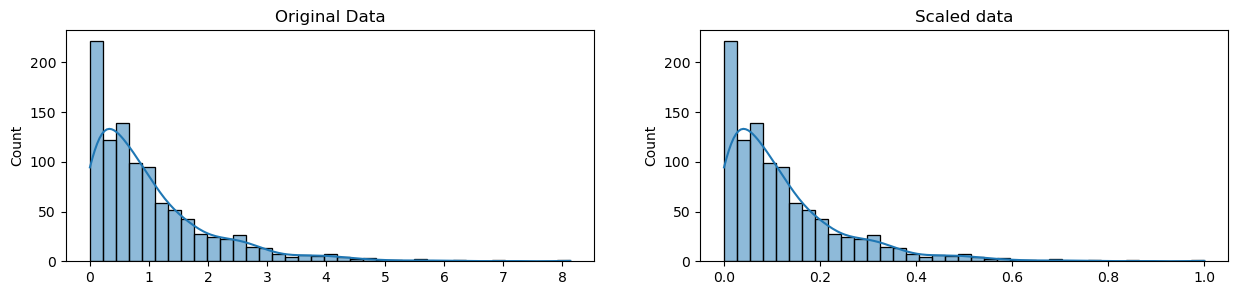

In [69]:
original_data = np.random.exponential(size=1000)

scaled_data = minmax_scaling(original_data, columns=[0])

fig, ax = plt.subplots(1, 2, figsize=(15, 3))
sns.histplot(original_data, ax=ax[0], kde=True, legend=False)
ax[0].set_title("Original Data")
sns.histplot(scaled_data, ax=ax[1], kde=True, legend=False)
ax[1].set_title("Scaled data")
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


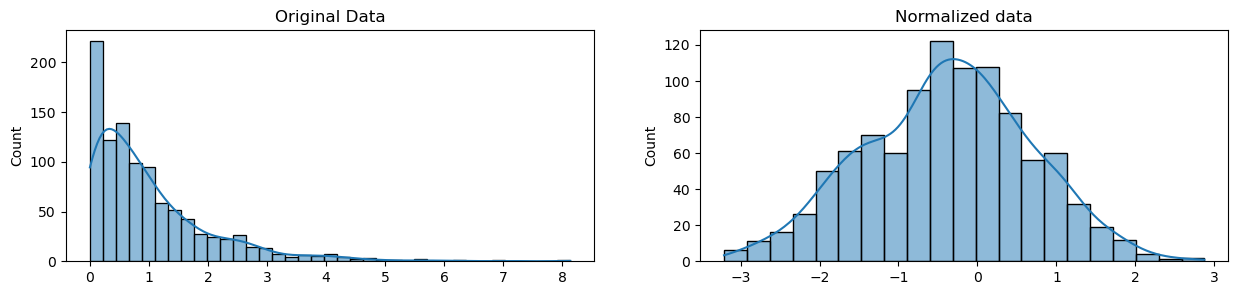

In [71]:
normalized_data = stats.boxcox(original_data)

fig, ax=plt.subplots(1, 2, figsize=(15, 3))

sns.histplot(original_data, ax=ax[0], kde=True, legend=False)
ax[0].set_title("Original Data")

sns.histplot(normalized_data[0], ax=ax[1], kde=True, legend=False)

ax[1].set_title("Normalized data")
plt.show()